In [289]:
import requests
import json
import pandas as pd
import numpy as np

# Scenario: Marketing Performance Dashboard Update

The marketing team at a large company uses multiple channels for their campaigns: social media (Facebook), their website, email campaigns, and paid search (Google Ads). They aim to aggregate and analyze data from these channels to provide insights into overall marketing performance.



## Data Description:

1. **Social Media Engagement (Facebook Graph API)**:
   - **Endpoint**: `GET './API/FacebookGraphAPI.json' `
   - **Data**: Collects post impressions, reach, likes, comments, and shares.
   - **Example Response**:
     ```json
     {
       "data": [
         {"date": "2023-01-01", "post_impressions": 10000, "post_reach": 7500, "likes": 1200, "comments": 150, "shares": 100},
         {"date": "2023-01-02", "post_impressions": 9500, "post_reach": 7000, "likes": 1100, "comments": 140, "shares": 90}
       ]
     }
     ```

2. **Website Traffic (Google Analytics API)**:
   - **Endpoint**: `GET './API/GoogleAnalyticsAPI.json'`
   - **Data**: Sessions, pageviews, and users.
   - **Example Response**:
     ```json
     {
       "reports": [
         {
           "data": {
             "rows": [
               {"dimensions": ["20230101"], "metrics": [{"values": ["1000", "3000", "900"]}]},
               {"dimensions": ["20230102"], "metrics": [{"values": ["950", "2800", "850"]}]}
             ]
           }
         }
       ]
     }
     ```

3. **Email Campaign Performance (Mailchimp API)**:
   - **Endpoint**: `GET './API/MailchimpAPI.json'`
   - **Data**: Emails sent, opens, clicks, bounces, and unsubscribes.
   - **Example Response**:
     ```json
     {
       "campaigns": [
         {"id": "campaign_001", "emails_sent": 5000, "opens": 3500, "clicks": 1750, "bounce": 50, "unsubscribe": 25},
         {"id": "campaign_002", "emails_sent": 4500, "opens": 3200, "clicks": 1600, "bounce": 40, "unsubscribe": 20}
       ]
     }
     ```

4. **Paid Search Metrics (Google Ads API)**:
   - **Endpoint**: `GET './API/GoogleAdsAPI.json'`
   - **Data**: Impressions, clicks, cost, and conversions.
   - **Example Response**:
     ```json
     {
       "reports": [
         {"campaignId": "78910", "date": "2023-01-01", "impressions": 12000, "clicks": 800, "cost": 600.00, "conversions": 80},
         {"campaignId": "78911", "date": "2023-01-02", "impressions": 11500, "clicks": 750, "cost": 580.00, "conversions": 75}
       ]
     }
     ```

## Fetching data

Let's define a function that will fetches data from API endpoint, which returns JSON data.

In [290]:
def fetch_json_data(endpoint_url):
    """
    Fetches data from API endpoint using the requests library.

    Parameters:
    - endpoint_url (str): The URL of the API endpoint.

    Returns:
    - data (dict): The JSON data fetched from the endpoint.
    """
    try:
        response = requests.get(endpoint_url)
        response.raise_for_status()  # Raises an HTTPError if the response status code is 4XX/5XX
        data = response.json()
        return data
    except requests.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.ConnectionError as conn_err:
        print(f"Connection error occurred: {conn_err}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [291]:
# URL to the server endpoint serving the Facebook Graph API JSON
endpoint_url = 'https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/MarketingPerformanceDashboardUpdate/API/FacebookGraphAPI.json'

# Fetch the data
facebook_data = fetch_json_data(endpoint_url)

# Check if data was successfully fetched
if facebook_data:
    print("Data fetched successfully:", facebook_data)
else:
    print("Failed to fetch data.")

Data fetched successfully: {'data': [{'date': '2023-01-01', 'page_id': '123456789', 'post_impressions': 10000, 'post_reach': 7500, 'likes': 1200, 'comments': 150, 'shares': 100}, {'date': '2023-01-02', 'page_id': '123456789', 'post_impressions': 9500, 'post_reach': 7000, 'likes': 1100, 'comments': 140, 'shares': 90}]}


In [292]:
# URL to the server endpoint serving the Google Ads API JSON
endpoint_url = 'https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/MarketingPerformanceDashboardUpdate/API/GoogleAdsAPI.json'

# Fetch the data
google_ads_data = fetch_json_data(endpoint_url)

# Check if data was successfully fetched
if google_ads_data:
    print("Data fetched successfully:", google_ads_data)
else:
    print("Failed to fetch data.")

Data fetched successfully: {'reports': [{'campaignId': '78910', 'date': '2023-01-01', 'impressions': 12000, 'clicks': '800', 'cost': 600.0, 'conversions': 80}, {'campaignId': '78911', 'date': '2023-01-02', 'impressions': 11500, 'clicks': '750', 'cost': 580.0, 'conversions': 75}, {'campaignId': '78912', 'date': '2023-01-03', 'impressions': 10000, 'clicks': '600', 'cost': 500.0, 'conversions': 70}]}


In [293]:
# URL to the server endpoint serving the Google Analytics API JSON
endpoint_url = 'https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/MarketingPerformanceDashboardUpdate/API/GoogleAnalyticsAPI.json'

# Fetch the data
google_analytics_data = fetch_json_data(endpoint_url)

# Check if data was successfully fetched
if google_analytics_data:
    print("Data fetched successfully:", google_analytics_data)
else:
    print("Failed to fetch data.")

Data fetched successfully: {'reports': [{'columnHeader': {'dimensions': ['ga:date'], 'metricHeader': {'metricHeaderEntries': [{'name': 'ga:sessions'}, {'name': 'ga:pageviews'}, {'name': 'ga:users'}]}}, 'data': {'rows': [{'dimensions': ['20230101'], 'metrics': [{'values': ['1000', '3000', '900']}]}, {'dimensions': ['20230102'], 'metrics': [{'values': ['950', '2800', '850']}]}]}}]}


In [294]:
# URL to the server endpoint serving the MailchimpAPI JSON
endpoint_url = 'https://raw.githubusercontent.com/ProgressBG-Python-Course/ProgressBG-Python-Digitall-Slides/gh-pages/pages/themes/BulkMappingUpdateWithPython/examples/MarketingPerformanceDashboardUpdate/API/MailchimpAPI.json'

# Fetch the data
mailchimp_data = fetch_json_data(endpoint_url)

# Check if data was successfully fetched
if mailchimp_data:
    print("Data fetched successfully:", mailchimp_data)
else:
    print("Failed to fetch data.")

Data fetched successfully: {'campaigns': [{'id': 'campaign_001', 'date_sent': '2023-01-01', 'emails_sent': 5000, 'opens': 3500, 'clicks': 1750, 'bounce': 50, 'unsubscribe': 25}, {'id': 'campaign_002', 'date_sent': '2023-01-02', 'emails_sent': 4500, 'opens': 3200, 'clicks': 1600, 'bounce': 40, 'unsubscribe': 20}]}


## Load data

In [295]:
# Load Facebook data into a Pandas DataFrame
if facebook_data:
    facebook_df = pd.DataFrame(facebook_data["data"])
else:
    raise Exception('No data to load')

facebook_df

,date,page_id,post_impressions,post_reach,likes,comments,shares
0,2023-01-01,123456789,10000,7500,1200,150,100
1,2023-01-02,123456789,9500,7000,1100,140,90


In [296]:
# Load GoogleAnalytics data into a Pandas DataFrame

# Extracting column names
if google_analytics_data:
    dimension_names = google_analytics_data['reports'][0]['columnHeader']['dimensions']
    metric_names = [
        entry['name'] for entry in
            google_analytics_data['reports'][0]['columnHeader']['metricHeader']['metricHeaderEntries']
    ]
    column_names = dimension_names + metric_names

    # Extracting data rows
    data_rows = []
    for row in google_analytics_data['reports'][0]['data']['rows']:
        dimensions = row['dimensions']
        metrics = row['metrics'][0]['values']
        combined_row = dimensions + metrics
        data_rows.append(combined_row)

    # Creating DataFrame
    google_analytics_df = pd.DataFrame(data_rows, columns=column_names)
else:
    raise Exception('No data to load')

google_analytics_df

,ga:date,ga:sessions,ga:pageviews,ga:users
0,20230101,1000,3000,900
1,20230102,950,2800,850


In [297]:
# Load GoogleAds data into a Pandas DataFrame
if google_ads_data:
    google_ads_df = pd.DataFrame(google_ads_data["reports"])
else:
    raise Exception('No data to load')

google_ads_df

,campaignId,date,impressions,clicks,cost,conversions
0,78910,2023-01-01,12000,800,600.0,80
1,78911,2023-01-02,11500,750,580.0,75
2,78912,2023-01-03,10000,600,500.0,70


In [298]:
# Load Mailchimp data into a Pandas DataFrame
if mailchimp_data:
    mailchimp_df = pd.DataFrame(mailchimp_data["campaigns"])
else:
    raise Exception('No data to load')

mailchimp_df

,id,date_sent,emails_sent,opens,clicks,bounce,unsubscribe
0,campaign_001,2023-01-01,5000,3500,1750,50,25
1,campaign_002,2023-01-02,4500,3200,1600,40,20


## Data insights

In [299]:
facebook_df

,date,page_id,post_impressions,post_reach,likes,comments,shares
0,2023-01-01,123456789,10000,7500,1200,150,100
1,2023-01-02,123456789,9500,7000,1100,140,90


In [300]:
google_ads_df

,campaignId,date,impressions,clicks,cost,conversions
0,78910,2023-01-01,12000,800,600.0,80
1,78911,2023-01-02,11500,750,580.0,75
2,78912,2023-01-03,10000,600,500.0,70


In [301]:
google_analytics_df

,ga:date,ga:sessions,ga:pageviews,ga:users
0,20230101,1000,3000,900
1,20230102,950,2800,850


In [302]:
mailchimp_df

,id,date_sent,emails_sent,opens,clicks,bounce,unsubscribe
0,campaign_001,2023-01-01,5000,3500,1750,50,25
1,campaign_002,2023-01-02,4500,3200,1600,40,20


## Create a unified dataset

We will merge the dataframes into one, using the data field as a common filed. 
However, the date columns have slightly different names across the DataFrames. Before merging, we should standardize these names.
Also, the data values in differents dataframes are not all in standard format, so we will convert all date columns to datetime objects for consistency.

### Standardize Date Column Names and Values

In [303]:
facebook_df['date'] = pd.to_datetime(facebook_df['date'])
google_ads_df['date'] = pd.to_datetime(google_ads_df['date'])
mailchimp_df['date'] = pd.to_datetime(mailchimp_df['date_sent']).rename('date')
google_analytics_df['date'] = pd.to_datetime(google_analytics_df['ga:date'], format='%Y%m%d').rename('date')
google_analytics_df.drop(columns='ga:date', inplace=True)


In [304]:
# Merge Facebook and Google Ads data
merged_df = pd.merge(facebook_df, google_ads_df, on='date', how='outer', suffixes=('_fb', '_ga'))

# Merge with Google Analytics data
merged_df = pd.merge(merged_df, google_analytics_df, on='date', how='outer')

# Finally, merge with Mailchimp data
merged_df = pd.merge(merged_df, mailchimp_df, on='date', how='outer', suffixes=('', '_mail'))
merged_df

,date,page_id,post_impressions,post_reach,likes,comments,shares,campaignId,impressions,clicks,...,ga:sessions,ga:pageviews,ga:users,id,date_sent,emails_sent,opens,clicks_mail,bounce,unsubscribe
0,2023-01-01,123456789,10000.0,7500.0,1200.0,150.0,100.0,78910,12000,800,...,1000,3000,900,campaign_001,2023-01-01,5000.0,3500.0,1750.0,50.0,25.0
1,2023-01-02,123456789,9500.0,7000.0,1100.0,140.0,90.0,78911,11500,750,...,950,2800,850,campaign_002,2023-01-02,4500.0,3200.0,1600.0,40.0,20.0
2,2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,78912,10000,600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop irrelevant columns

Next columns: 'page_id', 'campaignId', 'ga:date', 'date_sent', 'id' are irrelevent to our analysis and we will drop them in order to improve clarity, readability and performance.

We will use df.drop() method, passing errors='ignore' to ensure that no error is raised if any of the specified columns do not exist in merged_df.

In [305]:
# List of columns to drop
columns_to_drop = ['page_id', 'campaignId', 'ga:date', 'date_sent', 'id']

# Drop the columns
merged_df = merged_df.drop(columns=columns_to_drop, errors='ignore')
print(merged_df)


        date  post_impressions  post_reach   likes  comments  shares  \
0 2023-01-01           10000.0      7500.0  1200.0     150.0   100.0   
1 2023-01-02            9500.0      7000.0  1100.0     140.0    90.0   
2 2023-01-03               NaN         NaN     NaN       NaN     NaN   

   impressions clicks   cost  conversions ga:sessions ga:pageviews ga:users  \
0        12000    800  600.0           80        1000         3000      900   
1        11500    750  580.0           75         950         2800      850   
2        10000    600  500.0           70         NaN          NaN      NaN   

   emails_sent   opens  clicks_mail  bounce  unsubscribe  
0       5000.0  3500.0       1750.0    50.0         25.0  
1       4500.0  3200.0       1600.0    40.0         20.0  
2          NaN     NaN          NaN     NaN          NaN  


### Rename columns

To improve clarity we will remove the 'gs:' prefix in column names.

In [306]:
merged_df.rename(lambda cn:cn.replace('ga:', ''), axis=1, inplace=True)

## Data Cleaning

### Convert to appropriate data types

Let's get some info at our merged data

In [307]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3 non-null      datetime64[ns]
 1   post_impressions  2 non-null      float64       
 2   post_reach        2 non-null      float64       
 3   likes             2 non-null      float64       
 4   comments          2 non-null      float64       
 5   shares            2 non-null      float64       
 6   impressions       3 non-null      int64         
 7   clicks            3 non-null      object        
 8   cost              3 non-null      float64       
 9   conversions       3 non-null      int64         
 10  sessions          2 non-null      object        
 11  pageviews         2 non-null      object        
 12  users             2 non-null      object        
 13  emails_sent       2 non-null      float64       
 14  opens             2 non-null  

We notice that columns: 'clicks', 'sessions', 'pageviews' and 'users' are of object data type, but we know that they represent integers. So we will convert these columns to numerical data type, as this will inrease performance, functionality and memory usage.

In [308]:
# List of columns that should be numeric but are currently objects
columns_to_convert = ['clicks', 'sessions', 'pageviews', 'users']

# Convert these columns to numeric, coercing any errors (which will result in NaN values for non-convertible entries)
for col in columns_to_convert:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3 non-null      datetime64[ns]
 1   post_impressions  2 non-null      float64       
 2   post_reach        2 non-null      float64       
 3   likes             2 non-null      float64       
 4   comments          2 non-null      float64       
 5   shares            2 non-null      float64       
 6   impressions       3 non-null      int64         
 7   clicks            3 non-null      int64         
 8   cost              3 non-null      float64       
 9   conversions       3 non-null      int64         
 10  sessions          2 non-null      float64       
 11  pageviews         2 non-null      float64       
 12  users             2 non-null      float64       
 13  emails_sent       2 non-null      float64       
 14  opens             2 non-null  

### Handle NaN Values

We will replace NaN values with 0, to indicate that there were no activity on given channel for this period.

In [309]:
merged_df.fillna(0, inplace=True)

In [310]:
# print(merged_df)
print(merged_df)

        date  post_impressions  post_reach   likes  comments  shares  \
0 2023-01-01           10000.0      7500.0  1200.0     150.0   100.0   
1 2023-01-02            9500.0      7000.0  1100.0     140.0    90.0   
2 2023-01-03               0.0         0.0     0.0       0.0     0.0   

   impressions  clicks   cost  conversions  sessions  pageviews  users  \
0        12000     800  600.0           80    1000.0     3000.0  900.0   
1        11500     750  580.0           75     950.0     2800.0  850.0   
2        10000     600  500.0           70       0.0        0.0    0.0   

   emails_sent   opens  clicks_mail  bounce  unsubscribe  
0       5000.0  3500.0       1750.0    50.0         25.0  
1       4500.0  3200.0       1600.0    40.0         20.0  
2          0.0     0.0          0.0     0.0          0.0  


## Analyse data


### Plot the data to observe trends and patterns for key metrics

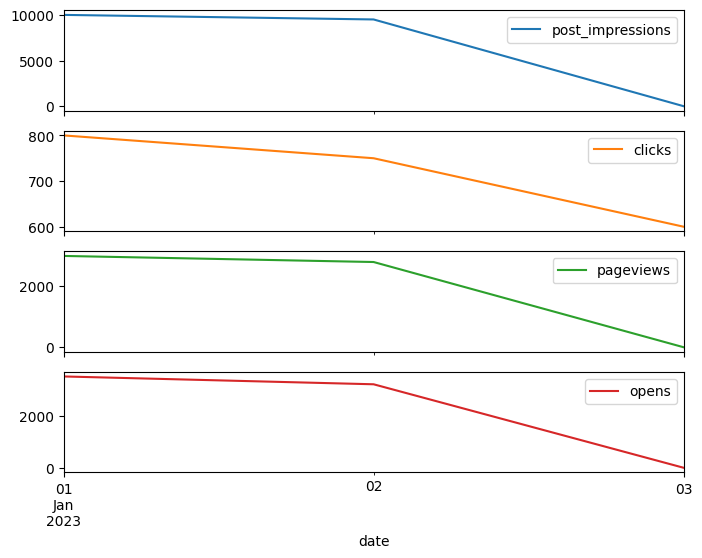

In [311]:
import matplotlib.pyplot as plt

# set 'date' column as index in order to plot the data
merged_df.set_index('date', inplace=True)
merged_df[['post_impressions', 'clicks', 'pageviews', 'opens']].plot(subplots=True, figsize=(8, 6))
plt.show()

### Channel Performance: How each marketing channel (social media, paid search, website traffic, email campaigns) contributes to overall marketing goals.
ROI Analysis: The return on investment (ROI) for paid channels (like paid search) by comparing costs against conversions and revenue (if revenue data can be inferred or is available).
Engagement Trends: How engagement metrics (likes, comments, shares, page views, session duration, email opens, etc.) trend over time and correlate with other activities or campaigns.
Conversion Rates: Conversion rates from each channel and how they vary over time.


### Calculate KPIs


#### Social Media Engagement Rate: 

This KPI measures the level of engagement that social media content receives from the audience. It is calculated by summing up the likes, comments, and shares for posts and dividing this sum by the total post reach. This rate provides insight into how effectively social media content is engaging the target audience, with higher rates indicating more engaging content.

#### Paid Search Conversion Rate: 

This KPI evaluates the effectiveness of paid search campaigns in converting clicks into desired actions, such as purchases or sign-ups. It is calculated by dividing the number of conversions by the total number of clicks received by the paid search ads. A higher conversion rate suggests that the paid search campaigns are successfully persuading users to take the desired action after clicking an ad.

#### Email Open Rate: 
This KPI assesses the performance of email marketing campaigns by measuring the proportion of sent emails that are opened by recipients. It is calculated by dividing the number of opens by the total number of emails sent. This rate helps in understanding the initial interest level of recipients towards the email content, with a higher open rate indicating that the emails are likely well-tailored to the audience or have compelling subject lines that encourage opening.

In [312]:
merged_df

,post_impressions,post_reach,likes,comments,shares,impressions,clicks,cost,conversions,sessions,pageviews,users,emails_sent,opens,clicks_mail,bounce,unsubscribe
date,,,,,,,,,,,,,,,,,
2023-01-01,10000.0,7500.0,1200.0,150.0,100.0,12000,800,600.0,80,1000.0,3000.0,900.0,5000.0,3500.0,1750.0,50.0,25.0
2023-01-02,9500.0,7000.0,1100.0,140.0,90.0,11500,750,580.0,75,950.0,2800.0,850.0,4500.0,3200.0,1600.0,40.0,20.0
2023-01-03,0.0,0.0,0.0,0.0,0.0,10000,600,500.0,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
# calculate KPIs and store them in a new DF
kpi_data = {
    'social_media_engagement_rate': (merged_df['likes'] + merged_df['comments'] + merged_df['shares']) / merged_df['post_reach'],
    'paid_search_conversion_rate': merged_df['conversions'] / merged_df['clicks'],
    'email_open_rate': merged_df['opens'] / merged_df['emails_sent'],
}
kpi_df = pd.DataFrame(kpi_data)
kpi_df

,social_media_engagement_rate,paid_search_conversion_rate,email_open_rate
date,,,
2023-01-01,0.193333,0.100000,0.700000
2023-01-02,0.190000,0.100000,0.711111
2023-01-03,NaN,0.116667,NaN


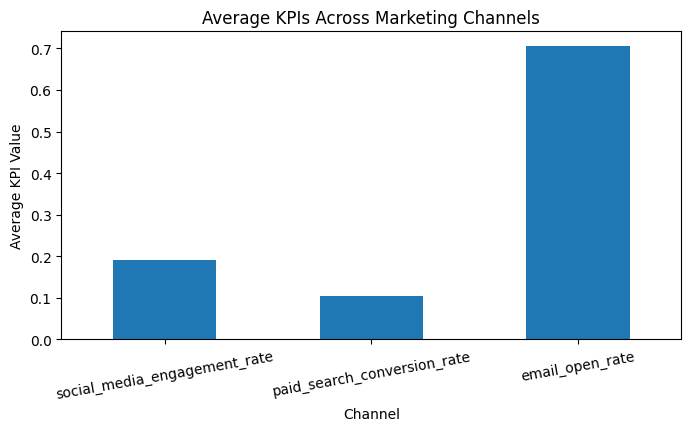

In [288]:
kpi_df.mean().plot(kind='bar', figsize=(8, 4))
plt.title('Average KPIs Across Marketing Channels')
plt.ylabel('Average KPI Value')
plt.xlabel('Channel')
plt.xticks(rotation=10)
plt.show()